In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.linalg import LinAlgError

from fooof import FOOOF, FOOOFGroup
from fooof.analysis import *
from fooof.synth import *

from ratios import *

In [2]:
# Open CSV
data = pd.read_csv("../dat/MIPDB_PublicFile.csv")

## Young Age

In [49]:
young = data[(data['Age'] >= 10) & (data['Age'] <= 13)]

#Extract ID's to open their corresponding files
young_IDs = young.ID.values

#Open Eyes closed data for all IDs
problem_files = []
missing_files = []
young_peaks = []
young_apcs = []
young_tb_ratios = []

for filename in young_IDs:
    try:
        # Construct FOOOFGroup model on psd
        curr = np.load('../dat/psds/'+ filename + '_ec_psds.npz')
        fg = FOOOFGroup(verbose=False,)
        fg.add_data(curr['arr_0'], curr['arr_1'][0])
        fg.fit()
        
        # Following ratio is only for one block
        young_tb_ratios.append(calc_group_band_ratio(fg, THETA_BAND, BETA_BAND))
        
        # Append params to respective array
        young_apcs.append(fg.get_all_data('aperiodic_params', 'exponent'))
        #young_peaks.append(fg.get_all_data('peak_params'))
        
    except FileNotFoundError:
        missing_files.append(filename)
    except ValueError:
        problem_files.append(filename)
    except LinAlgError:
        problem_files.append(filename)

In [64]:
from scipy.stats import pearsonr, spearmanr

In [65]:
spearmanr(young_apcs, young_tb_ratios)

SpearmanrResult(correlation=-0.4012187489805314, pvalue=1.6667301685901259e-137)

(-10, 10)

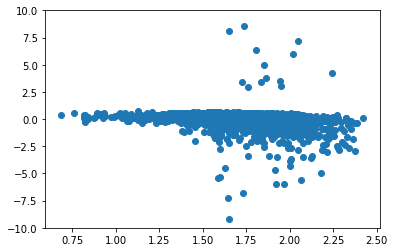

In [67]:
plt.scatter(young_apcs, young_tb_ratios)
plt.ylim([-10, 10])

In [68]:
young_apcs

[1.8608286919463988,
 1.9202812239531968,
 1.9244184353675424,
 1.992965257039558,
 2.02243006785677,
 2.049552821814828,
 2.007281496510309,
 1.8616144657836953,
 1.8751054890055665,
 1.8903822571284725,
 2.011964286819469,
 1.9668544151051641,
 1.9001959652525844,
 1.929237177011388,
 1.91916154466453,
 1.9256358129920417,
 2.033985761499558,
 1.9337613979580581,
 1.86599394005321,
 1.8988263244827899,
 1.9523097991156524,
 1.843098223577684,
 1.8591517433819569,
 1.854171646833611,
 1.7906934622164183,
 1.847666990305098,
 1.8290602923154875,
 1.8490179816235905,
 1.8130363348491665,
 1.9915813102011073,
 1.8333717831918626,
 1.8226925942518761,
 1.7505171476035515,
 1.7130520355356804,
 1.7196938665602048,
 1.913722321800085,
 1.8484299170987988,
 1.652377522416593,
 1.7317927563481277,
 1.6688194889530221,
 1.728172814202892,
 1.7672381318391746,
 1.7779215766800582,
 1.5622264769129093,
 1.7328925188640296,
 1.757203251060187,
 1.722534724148883,
 1.8749609605761839,
 1.865584540

In [59]:
np.correlate(young_apcs, young_tb_ratios)

array([-655.2811882])

In [58]:
for ind, val in enumerate(fg):
    val.get_fooof(i).plot()

AttributeError: 'FOOOFResult' object has no attribute 'get_fooof'

In [56]:
young_tb_ratios

[-0.11054402043213651,
 -0.750195921147979,
 -0.3316868972558768,
 -0.30354173215483427,
 -0.34703814777986325,
 -0.4043851147223272,
 -0.3158147880488036,
 -0.14570654095506178,
 -0.3801414700981047,
 -0.2793327812067791,
 -0.3049088783144473,
 -0.41776040020725996,
 -0.4172136518567172,
 -0.2727140452480974,
 -0.2558594236566212,
 -0.4407616488662324,
 -0.16156573336167349,
 -0.3604489091963461,
 -0.5048409470208092,
 -0.39803497336167637,
 -0.46874543289040316,
 -0.45177403157757706,
 -0.40853882246612694,
 -0.4256251365890552,
 -0.4713338742262108,
 -0.35826391580471945,
 -0.5378083455703765,
 -0.48586663316926937,
 -0.4379939838410728,
 -0.12379205807816107,
 -0.2139978211357383,
 -0.2809408058203594,
 -0.2389074525022572,
 -0.3290859363462904,
 -0.3848481195704606,
 -0.3677292923897372,
 0.03416331302299393,
 -0.1547997455721175,
 -0.36175109673813927,
 -0.5513908428182752,
 -0.6636023012365558,
 -0.08984421724938892,
 -0.039298535905469646,
 -0.3580963856578061,
 -0.734166977043

In [8]:
young_master = []
# aggregates the parameters for young people
for i in range(0,63,2):
    bgs = young_params[i].tolist()
    gausses = young_params[i+1].tolist()
    
    bgs_df = pd.DataFrame({"Aperiodic" : bgs})
    gausses_df = pd.DataFrame({"Gaussians" : gausses})
    
    cur = [bgs_df,gausses_df]
    young_master.append(cur)

In [15]:
young_tb_ratios
#young_params[1].size

[24.1025690859141,
 6.589696504479206,
 10.139577831942086,
 11.99201017208099,
 11.30398545168189,
 5.3691450518600465,
 11.171051379235733,
 11.22902198074539,
 9.576924051547199,
 6.188488889289273,
 17.60486809829772,
 7.3345346863802,
 11.995327299361088,
 11.0560447573997,
 9.241875994912629,
 10.079878928611885,
 6.263095269388019,
 20.029673230485475,
 6.428321666400844,
 8.162848527071622,
 24.561676463162737,
 15.378490289690042,
 11.005064731968588,
 6.464026055094546,
 10.78208666280815,
 5.21407724402537,
 5.564836018694556,
 6.018548537074463,
 6.739893331138162,
 9.534575820742738,
 5.302639776894459,
 7.5354610642668005]

## Old Age

In [13]:
old = data[(data['Age'] >= 25)]

#Extract ID's to open their corresponding files
old_IDs = old.ID.values

#Open Eyes closed data for all IDs
problem_files_old = []
missing_files_old = []
old_params = []
old_tb_ratios = []
for filename in old_IDs:
    try:
        curr = np.load('./dat/psds/'+ filename + '_ec_psds.npz')
        fg = FOOOFGroup(verbose=False)
        fg.add_data(curr['arr_0'], curr['arr_1'][0])
        fg.fit()
        
        # Following ratio is only for one block
        old_tb_ratios.append(calc_band_ratio(curr['arr_0'], curr['arr_1'][0], THETA_BAND, BETA_BAND))
        
        old_params.append(fg.get_all_data('background_params'))
        old_params.append(fg.get_all_data('peak_params'))
        
    except FileNotFoundError:
        missing_files_old.append(filename)
    except ValueError:
        problem_files_old.append(filename)
    except LinAlgError:
        problem_files_old.append(filename)

In [14]:
old_master = []
for i in range(0,7,2):
    bgs = old_params[i].tolist()
    gausses = old_params[i+1].tolist()
    
    bgs_df = pd.DataFrame({"Background" : bgs})
    gausses_df = pd.DataFrame({"Gaussians" : gausses})
    
    cur = [bgs_df, gausses_df]
    old_master.append(cur)

## Differences in BG params  

In [155]:
#young_master
y_bg_1 = 0
y_bg_2 = 0
count = 0

for i in young_master:
    y_bg_1 += i[0].values[0][0][0]
    y_bg_2 += i[0].values[0][0][1]
    count+=1
young_bg_1 = y_bg_1/(count+1)
young_bg_2 = y_bg_2/(count+1)

young_bg = [young_bg_1,young_bg_2]

In [156]:
o_bg_1 = 0
o_bg_2 = 0
count = 0

for i in old_master:
    o_bg_1 += i[0].values[0][0][0]
    o_bg_2 += i[0].values[0][0][1]
    count+=1
old_bg_1 = o_bg_1/(count+1)
old_bg_2 = o_bg_2/(count+1)

old_bg = [old_bg_1,old_bg_2]

In [164]:
print("background param 1 difference:",abs(old_bg[0] - young_bg[0]))
print("background param 2 difference:",abs(old_bg[1] - young_bg[1]))

background param 1 difference: 0.8852820763497281
background param 2 difference: 0.7435350192201011


## Differences in BandRatio Measures

In [20]:
diff_tb_ratio = np.abs(np.mean(young_tb_ratios) - np.mean(old_tb_ratios))
print("Average young Theta/Beta:", np.mean(young_tb_ratios))
print("Average old Theta/Beta:", np.mean(old_tb_ratios))
print("Difference in average Theta/Beta ratio", diff_tb_ratio)

Average young Theta/Beta: 8.189531639873604
Average old Theta/Beta: 4.1547301345251855
Difference in average Theta/Beta ratio 4.034801505348418
